# Descision Tree
`05_descision_tree.ipynb`

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

wine = pd.read_csv('./wine.csv')
wine.head()
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [50]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X = wine[['alcohol', 'sugar', 'pH']].to_numpy()
y = wine['class'].to_numpy()

# 훈련:테스트 = 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print('훈련점수: ', lr.score(X_train_scaled, y_train))
print('테스트점수: ', lr.score(X_test_scaled, y_test))

print(lr.classes_)
lr.predict_proba(X_test_scaled[:5])

print(lr.coef_, lr.intercept_)

훈련점수:  0.7808350971714451
테스트점수:  0.7776923076923077
[0. 1.]
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print('훈련점수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))

훈련점수:  0.996921300750433
테스트점수:  0.8592307692307692


0.3669367279393918


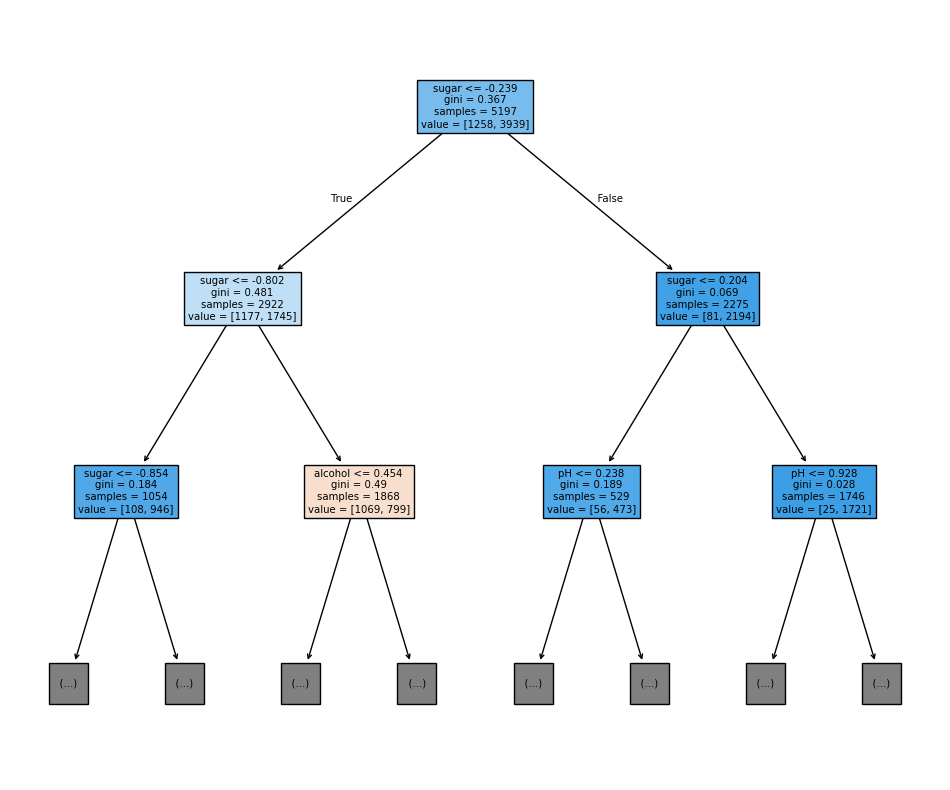

In [54]:
from sklearn.tree import plot_tree

# 지니불순도 1 - (음성클래스비율^2 + 양성클래스비율^2)
gini = 1 - ( (1258/5197)**2 + (3939/5197)**2)
print(gini)

plt.figure(figsize=(12,10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

훈련점수:  0.8454877814123533
테스트점수:  0.8415384615384616


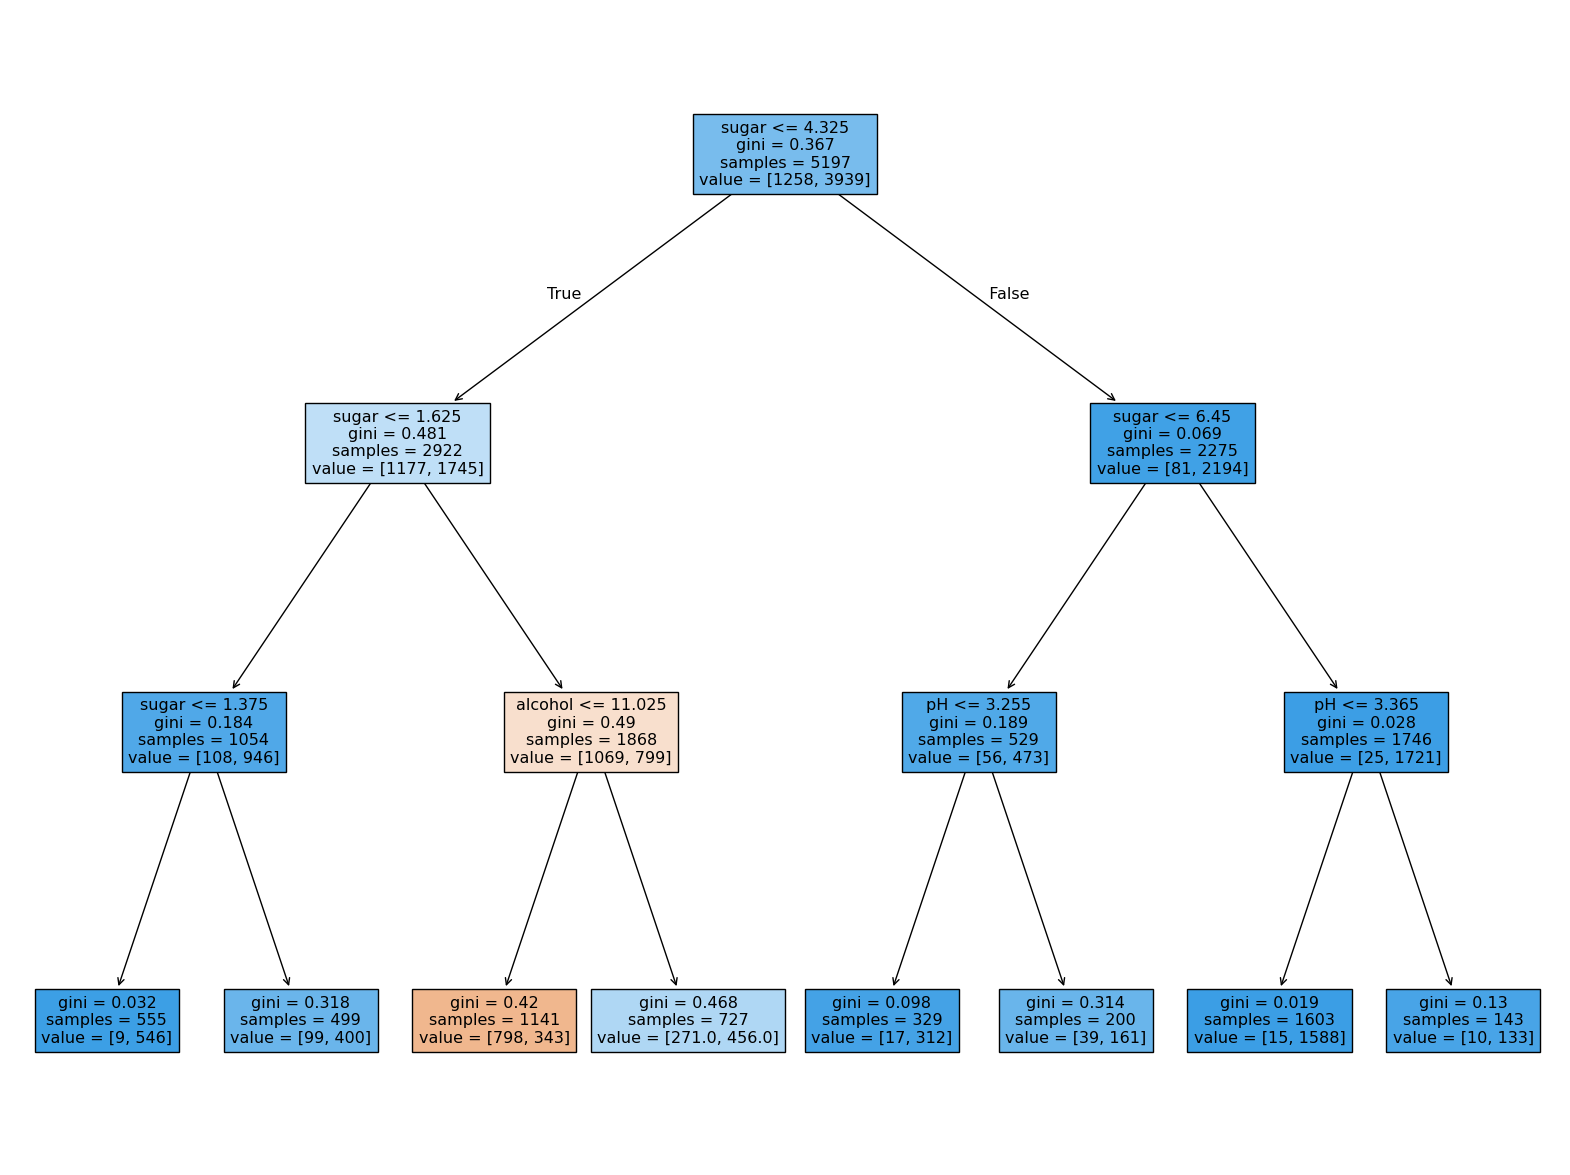

In [55]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print('훈련점수: ', dt.score(X_train, y_train))
print('테스트점수: ', dt.score(X_test, y_test))


plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 교차 검증 (Cross Validation)

테스트 셋은 모델 검증 마지막 단계에서 1번만 확인.

In [ ]:
# 훈련셋 (sub) | 검증셋 (val) | 테스트셋 (test)
# 80%                 20%
# 60%     20%         20%

In [58]:
wine = pd.read_csv('./wine.csv')
X = wine[['alcohol', 'sugar', 'pH']]
y = wine['class']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 이 부분은 뒤에 나올 cross_validate 를 수동으로 해본것! 실제로 우리가 실행하진 않을것
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [69]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub, y_sub)
print('훈련: ', dt.score(X_sub, y_sub))
print('검증: ', dt.score(X_val, y_val))

훈련:  0.9969207082371054
검증:  0.86


In [ ]:
# K-Fold Cross Validation (데이터를 쪼개서 훈련-검증 데이터를 바꿔가며 검증 진행 -> 점수 평균)
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)
display(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00787354, 0.00721216, 0.00632668, 0.00654745, 0.00605893]),
 'score_time': array([0.00311518, 0.00135064, 0.00166011, 0.00136924, 0.00160241]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

0.855300214703487


In [ ]:
# 폴드 기본값 5가 아닌 다른 값을 쓰고 싶을 경우
from sklearn.model_selection import StratifiedKFold
#                                       접기 전에 최초 1회 셔플링    
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))

0.8703105083740921


## 하이퍼 파라미터 튜닝
1. GridSearch 을 진행할 하이퍼 파라미터 선택
2. 그리드 서치 수행(fit)
3. 최적 조합을 찾고, `gs` 객체에 저장됨.
4. 그리드 서치는 최상의 매개변수에서, 전체 훈련 세트를 사용해 최종 모델을 훈련

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006],
}
                  
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # 모델
    param_grid=params,  # 확인할 하이퍼파라미터의 이름: 값들
    n_jobs=-1,  # CPU 최대 코어
)

gs.fit(X_train, y_train)

# Grid Search 결과 가장 좋은 파라미터 조합으로 모델 만들기
print(gs.best_params_, gs.cv_results_['mean_test_score'])

dt = gs.best_estimator_
dt.score(X_train, y_train)

{'min_impurity_decrease': 0.0001} [0.86819297 0.86453617 0.86492226 0.86780891 0.86761605 0.86338306]


0.9615162593804117

In [93]:
params = {
    # 노드 분할을 위한 최소 불순도
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    # 트리 깊이
    'max_depth': range(5, 20, 1),
    # 노드를 나누기 위한 최소 샘플 수
    'min_samples_split': range(2, 100, 10),
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [ ]:
# 내부 교차검증 결과 가장 높은 평균 점수
np.max(gs.cv_results_['mean_test_score'])

# 모든 하이퍼파라미터 교차검증 끝에 찾은 학습이 끝난 최고의 모델
dt_best = gs.best_estimator_
# 로 아껴놨던 테스트 진행 -> 점수
dt_best.score(X_test, y_test)


0.8615384615384616